In [358]:
"""
Alamu Olabode Afolabi
1498663
Guide to Engineering Data Science
Homework 7

Nov 16 2017

"""

'\nAlamu Olabode Afolabi\n1498663\nGuide to Engineering Data Science\nHomework 7\n\nNov 16 2017\n\n'

In [359]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [360]:
# import the dataframes
df1 = pd.read_excel('uppermoon1.xls')
df2 = pd.read_excel('uppermoon2.xls')
df3 = pd.read_excel('lowermoon1.xls')
df4 = pd.read_excel('lowermoon2.xls')

In [361]:
from sklearn.metrics import classification_report, confusion_matrix

In [362]:
print(df1.head())

          x          y
0 -0.740827  12.316503
1 -5.054580   7.536108
2 -8.466375   2.454594
3 -3.925396   7.998382
4  1.669893   9.761233


In [363]:
print(df2.head())

           x          y
0   3.608218  10.307395
1  -7.184463  10.749672
2  -8.597160   2.069245
3  11.127010   2.664789
4  -2.229553  12.103837


In [364]:
print(df3.head())

           x          y
0   9.259173 -13.316503
1   4.945420  -8.536108
2   1.533625  -3.454594
3   6.074604  -8.998382
4  11.669893 -10.761233


In [365]:
print(df4.head())

           x         y
0  13.608218 -6.307395
1   2.815537 -6.749672
2   1.402840  1.930755
3  21.127010  1.335211
4   7.770447 -8.103837


In [366]:
# Create a new column in the lowermoo1 dataset called class
df3['Class'] = 1
df1['Class'] = 2
# Create a new column in the lowermoo1 dataset called class
df4['Class'] = 1
df2['Class'] = 2

In [367]:
print(df3.head())

           x          y  Class
0   9.259173 -13.316503      1
1   4.945420  -8.536108      1
2   1.533625  -3.454594      1
3   6.074604  -8.998382      1
4  11.669893 -10.761233      1


In [368]:
print(df1.head())

          x          y  Class
0 -0.740827  12.316503      2
1 -5.054580   7.536108      2
2 -8.466375   2.454594      2
3 -3.925396   7.998382      2
4  1.669893   9.761233      2


In [369]:
# Append both dataframes together
linear = df3.append(df1,ignore_index = True)
Non_linear = df4.append(df2,ignore_index = True)

In [370]:
print(linear.tail())

             x          y  Class
1995  0.355699  12.780148      2
1996  9.115311   8.547120      2
1997  5.327797   7.170790      2
1998 -6.037529   8.611791      2
1999 -3.992157   7.413758      2


In [371]:
print(linear.head())

           x          y  Class
0   9.259173 -13.316503      1
1   4.945420  -8.536108      1
2   1.533625  -3.454594      1
3   6.074604  -8.998382      1
4  11.669893 -10.761233      1


In [372]:
print(Non_linear.tail())

              x          y  Class
1995   7.924346   2.564063      2
1996   4.952574   9.434104      2
1997  -7.871613   4.074110      2
1998  10.811611   0.318194      2
1999   3.059427  11.948280      2


In [373]:
print(Non_linear.head())

           x         y  Class
0  13.608218 -6.307395      1
1   2.815537 -6.749672      1
2   1.402840  1.930755      1
3  21.127010  1.335211      1
4   7.770447 -8.103837      1


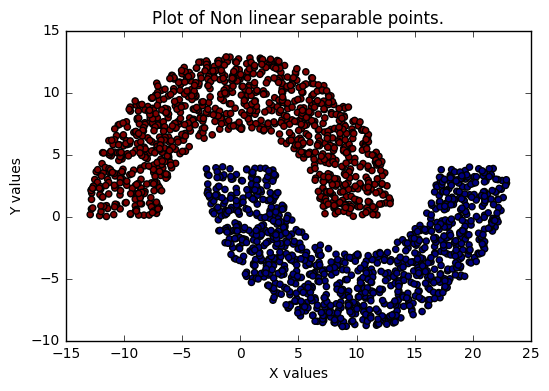

In [374]:
# Visualise the data
plt.scatter(Non_linear['x'], Non_linear['y'],c = Non_linear['Class'] )
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Plot of Non linear separable points.')
plt.show()

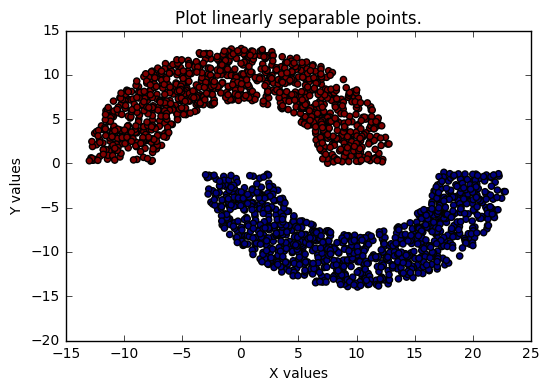

In [375]:
plt.scatter(linear['x'], linear['y'],c = linear['Class'] )
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Plot linearly separable points.')
plt.show()

In [376]:
# Check for missing values in both datasets
print(linear.isnull().sum())

x        0
y        0
Class    0
dtype: int64


In [377]:
# for nonlinear dataset
print(Non_linear.isnull().sum())

x        0
y        0
Class    0
dtype: int64


In [378]:
print('No missing values in either datasets')

No missing values in either datasets


In [437]:
# Standaradise both datasets
# Import the library
from sklearn.preprocessing import StandardScaler
print('--------------------------------------------')
print('STandardize dataset')

--------------------------------------------
STandardize dataset


In [438]:
# for the linear dataset
scaled = StandardScaler()
scaled.fit(linear)
linear = scaled.transform(linear)

In [439]:
# for non linear dataset
scaled.fit(Non_linear)
Non_linear = scaled.transform(Non_linear)

SPlit the data into training and test

In [441]:
# Split the data into training and data
from sklearn.cross_validation import train_test_split
print('-----------------------------------------------')
print('Train, test, split')

-----------------------------------------------
Train, test, split


In [442]:
# get the X matrix and y matrix for each dataset
# for linear
X_linear = linear[:,[0,1]]
Y_linear = linear[:,2]
# for non linear separable dataset
X_nonlinear = Non_linear[:,[0,1]]
Y_nonlinear = Non_linear[:,2]

Linear dataset classification

In [443]:
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_linear, Y_linear, test_size=0.3)

Decision tree for linearly separable dataset

In [444]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_l,y_train_l)
linear_prediction = dt.predict(X_test_l)

In [445]:
print('Decision tree for linear separable')
print(confusion_matrix(y_test_l,linear_prediction))

Decision tree for linear separable
[[299   0]
 [  0 301]]


In [446]:
print(classification_report(y_test_l,linear_prediction))

             precision    recall  f1-score   support

       -1.0       1.00      1.00      1.00       299
        1.0       1.00      1.00      1.00       301

avg / total       1.00      1.00      1.00       600



Random Forest for linear dataset

In [447]:
# Import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate it
rfc = RandomForestClassifier()
# fit the data
rfc.fit(X_train_l,y_train_l)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [449]:
# make predictions off the data
rfc_linear_prediction = rfc.predict(X_test_l)
print('Random forest result linear dataset')

Random forest result linear dataset


In [450]:
print(confusion_matrix(y_test_l,rfc_linear_prediction))

[[299   0]
 [  0 301]]


In [451]:
print(classification_report(y_test_l,rfc_linear_prediction))

             precision    recall  f1-score   support

       -1.0       1.00      1.00      1.00       299
        1.0       1.00      1.00      1.00       301

avg / total       1.00      1.00      1.00       600



Support Vector Machine Classification for linearly separable dataset

In [452]:
from sklearn.svm import SVC

In [453]:
# instantiate
svc = SVC()
# fit the SVM classifier to the training dataset
svc.fit(X_train_l,y_train_l)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [456]:
# Create predictions
svc_linear_prediction = svc.predict(X_test_l)
print('SVM for linear dataset')

SVM for linear dataset


In [457]:
# print confusion matrix and classification report
print(confusion_matrix(y_test_l,svc_linear_prediction))
print(classification_report(y_test_l,svc_linear_prediction))

[[299   0]
 [  0 301]]
             precision    recall  f1-score   support

       -1.0       1.00      1.00      1.00       299
        1.0       1.00      1.00      1.00       301

avg / total       1.00      1.00      1.00       600



In [458]:
print(classification_report(y_test_l,svc_linear_prediction))

             precision    recall  f1-score   support

       -1.0       1.00      1.00      1.00       299
        1.0       1.00      1.00      1.00       301

avg / total       1.00      1.00      1.00       600



Multilayer perceptron for linearly separable dataset

In [459]:
from sklearn.neural_network import MLPClassifier

In [460]:
mlp = MLPClassifier(alpha = 1)
mlp.fit(X_train_l, y_train_l)

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [462]:
mlp_linear_prediction = mlp.predict(X_test_l)
print('Result for Multilayer perceptron linear dataset')

Result for Multilayer perceptron linear dataset


In [463]:
# print confusion matrix and classification report
print(confusion_matrix(y_test_l,mlp_linear_prediction))
print(classification_report(y_test_l,mlp_linear_prediction))

[[299   0]
 [  0 301]]
             precision    recall  f1-score   support

       -1.0       1.00      1.00      1.00       299
        1.0       1.00      1.00      1.00       301

avg / total       1.00      1.00      1.00       600



Naive Bayes for linear separable datasets

In [464]:
from sklearn.naive_bayes import GaussianNB

In [466]:
# fit and predict
gb = GaussianNB()
gb.fit(X_train_l, y_train_l)
gb_linear_prediction = gb.predict(X_test_l)
print('Naive bayes result linear dataset')

Naive bayes result linear dataset


In [467]:
# print confusion matrix and classification report
print(confusion_matrix(y_test_l,gb_linear_prediction))

[[298   1]
 [  6 295]]


In [468]:
print(classification_report(y_test_l,gb_linear_prediction))

             precision    recall  f1-score   support

       -1.0       0.98      1.00      0.99       299
        1.0       1.00      0.98      0.99       301

avg / total       0.99      0.99      0.99       600



Perceptron for linearly separable dataset

In [469]:
from sklearn.linear_model import perceptron
pcp = perceptron.Perceptron(max_iter=100, verbose=0, random_state=None, fit_intercept=True, tol=0.002)
pcp.fit(X_train_l, y_train_l)
pcp_linear_prediction = pcp.predict(X_test_l)
print('Result for perceptron linear dataset')
# print confusion matrix and classification report
print(confusion_matrix(y_test_l,pcp_linear_prediction))
print(classification_report(y_test_l,pcp_linear_prediction))

Result for perceptron linear dataset
[[299   0]
 [  0 301]]
             precision    recall  f1-score   support

       -1.0       1.00      1.00      1.00       299
        1.0       1.00      1.00      1.00       301

avg / total       1.00      1.00      1.00       600



Non linear dataset classification

Decision tree for non linear separable dataset

In [470]:
# SPlit the nonlinearly separable dataset
X_train_nl, X_test_nl, y_train_nl, y_test_nl = train_test_split(X_nonlinear, Y_nonlinear, 
                                                                test_size=0.3)

In [471]:
from sklearn.tree import DecisionTreeClassifier

In [472]:
dt = DecisionTreeClassifier()

In [473]:
dt.fit(X_train_nl,y_train_nl)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [475]:
nonlinear_prediction = dt.predict(X_test_nl)
print('Decsision tree for Nonlinear result')

Decsision tree for Nonlinear result


In [476]:
# print the confusiion matrix
print(confusion_matrix(y_test_nl,nonlinear_prediction))

[[285   0]
 [  1 314]]


In [477]:
# print classification report
print(classification_report(y_test_nl,nonlinear_prediction))

             precision    recall  f1-score   support

       -1.0       1.00      1.00      1.00       285
        1.0       1.00      1.00      1.00       315

avg / total       1.00      1.00      1.00       600



Random forest for non linear dataset

In [478]:
# Import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate it
rfc = RandomForestClassifier()
# fit the data
rfc.fit(X_train_nl,y_train_nl)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [480]:
# make predictions off the data
rfc_nonlinear_prediction = rfc.predict(X_test_nl)
print('Random forest result for nonlinear dataset')

Random forest result for nonlinear dataset


In [481]:
print(confusion_matrix(y_test_nl,rfc_nonlinear_prediction))

[[285   0]
 [  1 314]]


In [482]:
print(classification_report(y_test_nl,rfc_nonlinear_prediction))

             precision    recall  f1-score   support

       -1.0       1.00      1.00      1.00       285
        1.0       1.00      1.00      1.00       315

avg / total       1.00      1.00      1.00       600



Support Vector Machines for non linear separable dataset

In [483]:
# import the classifier
from sklearn.svm import SVC

In [484]:
# Instantiate it
svc = SVC()
# fit to the training data
svc.fit(X_train_nl, y_train_nl)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [486]:
# make predictions
svc_nonlinear_prediction = svc.predict(X_test_nl)
print('SVM result for non linear dataset')

SVM result for non linear dataset


In [487]:
# print classification report and confusion matrix
print(confusion_matrix(y_test_nl,svc_nonlinear_prediction))

[[285   0]
 [  0 315]]


In [488]:
print(classification_report(y_test_nl,svc_nonlinear_prediction))

             precision    recall  f1-score   support

       -1.0       1.00      1.00      1.00       285
        1.0       1.00      1.00      1.00       315

avg / total       1.00      1.00      1.00       600



Multilayer perceptron for nonlinearly separable dataset

In [490]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha = 1)
mlp.fit(X_train_nl, y_train_nl)
mlp_nonlinear_prediction = mlp.predict(X_test_nl)
print('MLP classifier for non linear dataset result')
# print confusion matrix and classification report
print(confusion_matrix(y_test_nl,mlp_nonlinear_prediction))
print(classification_report(y_test_nl,mlp_nonlinear_prediction))

MLP classifier for non linear dataset result
[[281   4]
 [ 10 305]]
             precision    recall  f1-score   support

       -1.0       0.97      0.99      0.98       285
        1.0       0.99      0.97      0.98       315

avg / total       0.98      0.98      0.98       600



Perceptron for nonlinear dataset

In [491]:
from sklearn.linear_model import perceptron

In [492]:
pcp = perceptron.Perceptron(max_iter=100, verbose=0, random_state=None, fit_intercept=True, tol=0.002)

In [493]:
pcp.fit(X_train_nl, y_train_nl)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=100, n_iter=None, n_jobs=1, penalty=None, random_state=None,
      shuffle=True, tol=0.002, verbose=0, warm_start=False)

In [495]:
pcp_nonlinear_prediction = pcp.predict(X_test_nl)
print('Perceptron for non linear dataset')

Perceptron for non linear dataset


In [496]:
# print confusion matrix and classification report
print(confusion_matrix(y_test_nl,pcp_nonlinear_prediction))
print(classification_report(y_test_nl,pcp_nonlinear_prediction))

[[241  44]
 [  6 309]]
             precision    recall  f1-score   support

       -1.0       0.98      0.85      0.91       285
        1.0       0.88      0.98      0.93       315

avg / total       0.92      0.92      0.92       600



Naive Bayes for nonlinear separable dataset

In [497]:
from sklearn.naive_bayes import GaussianNB

In [498]:
gb = GaussianNB()

In [499]:
gb.fit(X_train_nl, y_train_nl)

GaussianNB(priors=None)

In [501]:
gb_nonlinear_prediction = gb.predict(X_test_nl)
print('Naive Bayes result for non linear dataset')

Naive Bayes result for non linear dataset


In [502]:
print(classification_report(y_test_nl,gb_nonlinear_prediction))
print('_______________________________________________________')

             precision    recall  f1-score   support

       -1.0       0.90      0.93      0.92       285
        1.0       0.94      0.90      0.92       315

avg / total       0.92      0.92      0.92       600

_______________________________________________________


Conclusion

In [507]:
print('Ranking for linearly separable dataset')
print('Decision tree,')
print('Random forest')
print('SVM')
print('MLP')
print('Perceptron')
print('Naive bayes')
print('____________________________________')

Ranking for linearly separable dataset
Decision tree,
Random forest
SVM
MLP
Perceptron
Naive bayes
____________________________________


In [509]:
print('Ranking for nonlinearly separable dataset')
print('Random forest')
print('SVM')
print('Decision tree,')


print('MLP')
print('Perceptron')
print('Naive bayes')
print('_________________________________________________________')

Ranking for nonlinearly separable dataset
Random forest
SVM
Decision tree,
MLP
Perceptron
Naive bayes
_________________________________________________________


In [510]:
print('The end')

The end
